In [1]:
import os
os.environ["JAVA_HOME"] = r"C:\Program Files\Java\jdk-17"
os.environ["PATH"] = r"C:\Program Files\Java\jdk-17\bin;" + os.environ["PATH"]

In [2]:
!java -version

java version "17.0.11" 2024-04-16 LTS
Java(TM) SE Runtime Environment (build 17.0.11+7-LTS-207)
Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)


In [3]:
import h2o
h2o.init(port=54367)

Checking whether there is an H2O instance running at http://localhost:54367..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)
  Starting server from C:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Paul\AppData\Local\Temp\tmpr8f4a7kt
  JVM stdout: C:\Users\Paul\AppData\Local\Temp\tmpr8f4a7kt\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\Paul\AppData\Local\Temp\tmpr8f4a7kt\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:54367
Connecting to H2O server at http://127.0.0.1:54367 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_Paul_i0v7zv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,32
H2O_cluster_allowed_cores:,32
H2O_cluster_status:,"locked, healthy"


In [4]:
import pandas as pd
df = pd.read_csv('../data_preprocessing/pivoted_cancer.csv')

In [5]:
df.columns

Index(['State', 'State-County', '1,1,2,2-Tetrachloroethane', '1,3-Butadiene',
       '1,4-Dichlorobenzene', '2,2,4-Trimethylpentane', 'Acetaldehyde',
       'Acrolein', 'Ammonia', 'Arsenic Compounds', 'Benzene',
       'Beryllium Compounds', 'Cadmium Compounds', 'Carbon Dioxide',
       'Carbon Monoxide', 'Carbon Tetrachloride', 'Chlorobenzene',
       'Chloroform', 'Chromium Compounds', 'Cobalt Compounds', 'Cumene',
       'Ethyl Chloride', 'Ethylbenzene', 'Formaldehyde', 'Hexane',
       'Lead Compounds', 'Manganese Compounds', 'Mercury Compounds', 'Methane',
       'Methanol', 'Methyl Isobutyl Ketone', 'Methylene Chloride',
       'Naphthalene', 'Nickel Compounds', 'Nitrogen Oxides', 'Nitrous Oxide',
       'PM10 Primary (Filt + Cond)', 'PM2.5 Primary (Filt + Cond)', 'Phenol',
       'Polycyclic Organic Matter', 'Propionaldehyde', 'Selenium Compounds',
       'Styrene', 'Sulfur Dioxide', 'Toluene', 'Vinyl Chloride',
       'Volatile Organic Compounds', 'Xylenes (Mixed Isomers)', 'Da

In [6]:
from h2o.automl import H2OAutoML

In [7]:
h2o_df = h2o.H2OFrame(df)

splits = h2o_df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Specify input and output features
columns = h2o_df.columns


# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=7200, seed=1)
aml.train(y='Data_Value', training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:01:46.800: AutoML: XGBoost is not available; skipping it.
07:01:46.874: _train param, Dropping bad and constant columns: [State-County]


07:01:47.801: _train param, Dropping bad and constant columns: [State-County]

██
07:01:50.418: _train param, Dropping unused columns: [State-County]
07:01:50.577: _train param, Dropping bad and constant columns: [State-County]

█████
07:01:58.339: _train param, Dropping bad and constant columns: [State-County]


07:01:59.576: _train param, Dropping bad and constant columns: [State-County]

█
07:02:01.105: _train param, Dropping bad and constant columns: [State-County]
07:02:02.506: _train param, Dropping unused columns: [State-County]

█
07:02:02.654: _train param, Dropping unused columns: [State-County]
07:02:02.814: _train param, Dropping bad and constant columns: [State-County]

██
07:02:06.698: _train param, Dropping bad and const

In [8]:
model_path = h2o.save_model(model=aml.leader, path="../saved_models", force=True)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20241113_70146_model_272,0.421114,0.177337,0.295608,0.0563602,0.177337,116,0.003787,GBM
GBM_grid_1_AutoML_1_20241113_70146_model_63,0.423179,0.17908,0.293839,0.0567613,0.17908,102,0.004336,GBM
StackedEnsemble_BestOfFamily_7_AutoML_1_20241113_70146,0.423651,0.17948,0.300355,0.0566205,0.17948,130,0.009588,StackedEnsemble
GBM_grid_1_AutoML_1_20241113_70146_model_51,0.423882,0.179676,0.292579,0.0567406,0.179676,107,0.003713,GBM
GBM_grid_1_AutoML_1_20241113_70146_model_6,0.424012,0.179786,0.296698,0.0567454,0.179786,262,0.00502,GBM
GBM_grid_1_AutoML_1_20241113_70146_model_126,0.42415,0.179903,0.297448,0.0567772,0.179903,59,0.003246,GBM
StackedEnsemble_AllModels_6_AutoML_1_20241113_70146,0.424177,0.179926,0.297014,0.0567639,0.179926,1034,0.044311,StackedEnsemble
GBM_grid_1_AutoML_1_20241113_70146_model_180,0.424233,0.179974,0.296593,0.0568431,0.179974,97,0.004149,GBM
GBM_grid_1_AutoML_1_20241113_70146_model_386,0.424252,0.17999,0.294785,0.0567354,0.17999,74,0.003136,GBM
GBM_grid_1_AutoML_1_20241113_70146_model_314,0.424412,0.180125,0.297776,0.056837,0.180125,84,0.003288,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

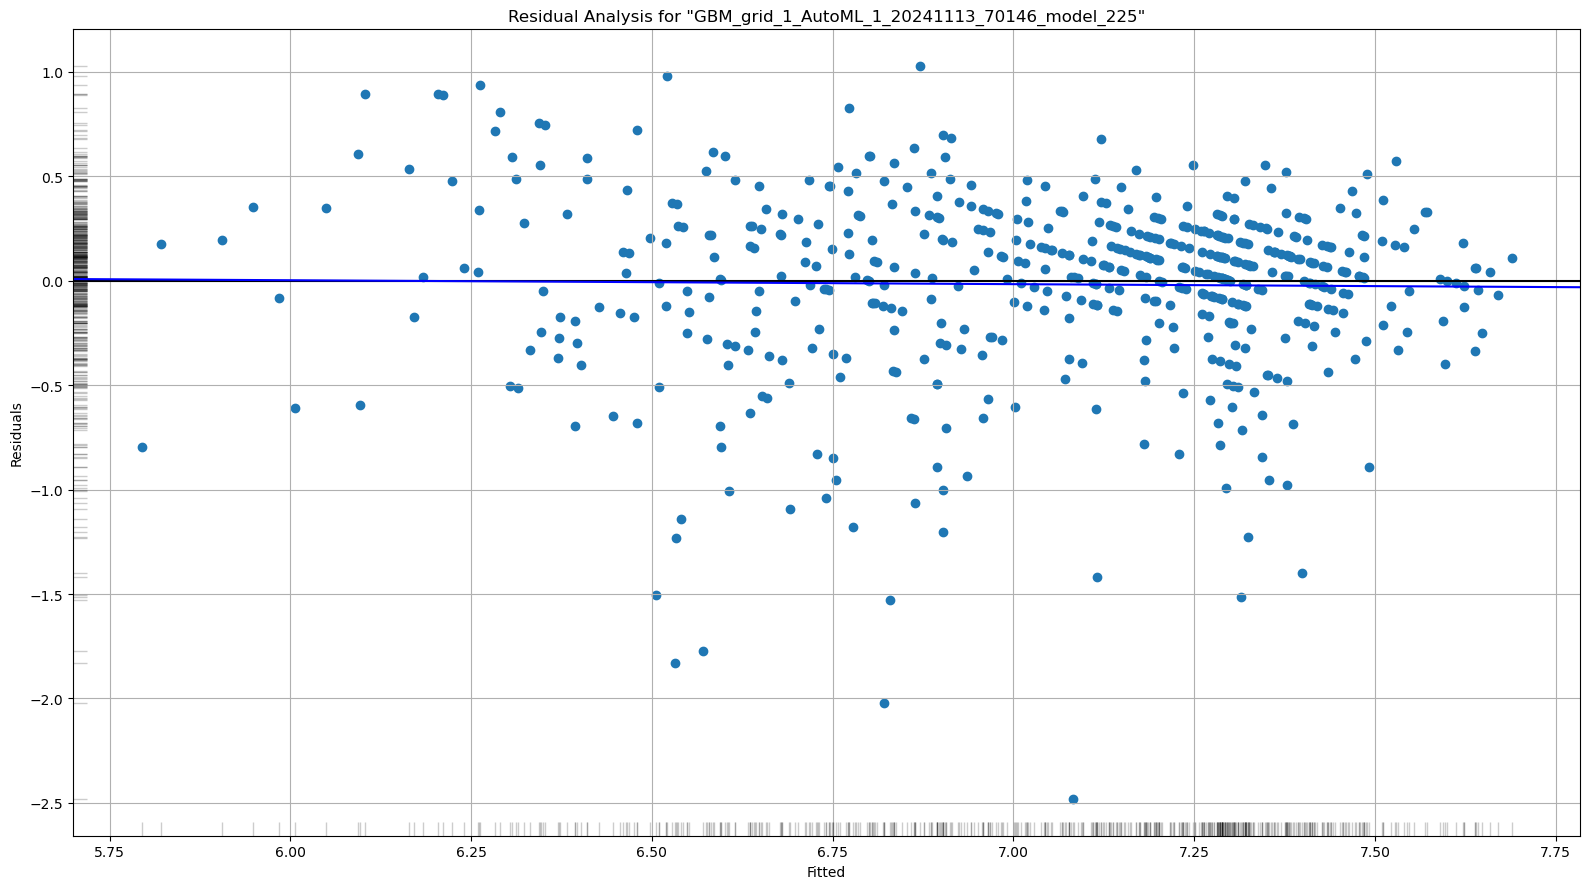

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

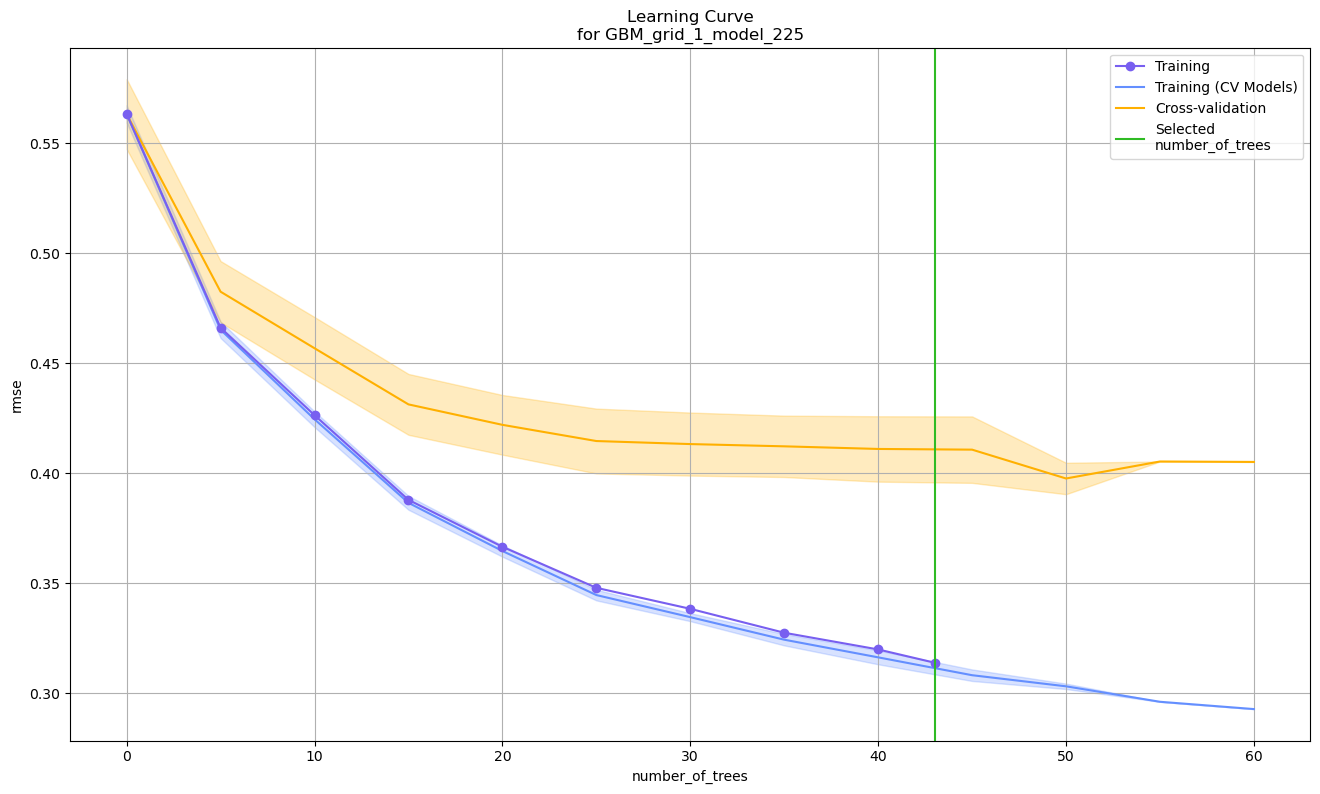

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

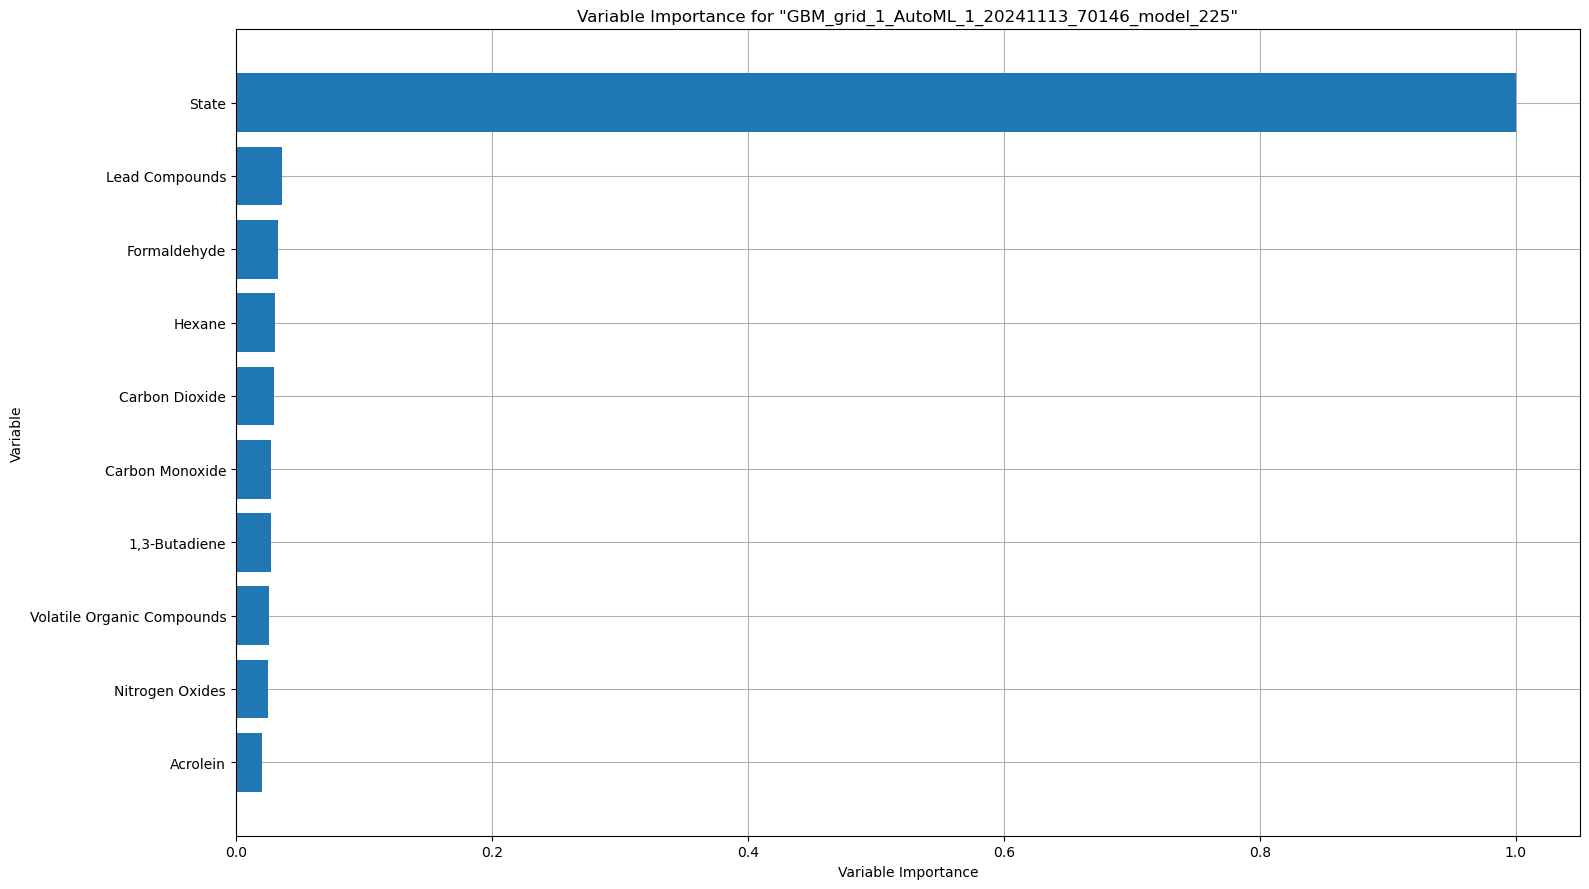

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

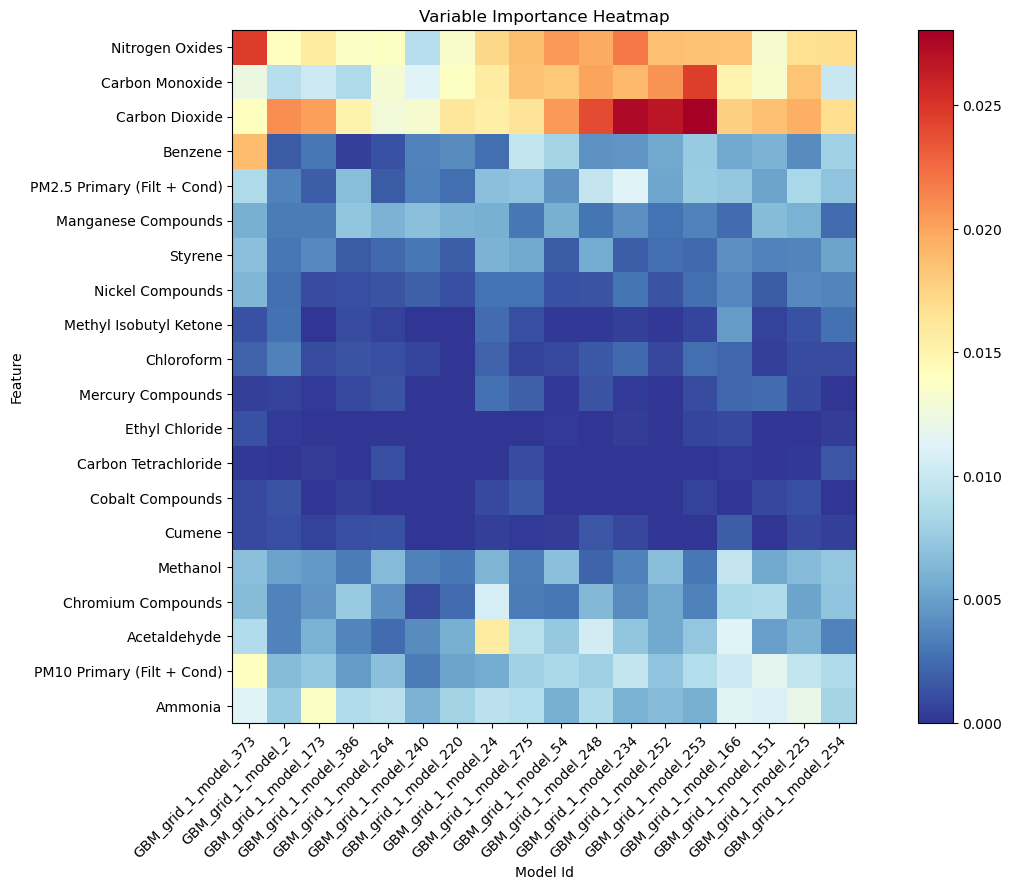

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

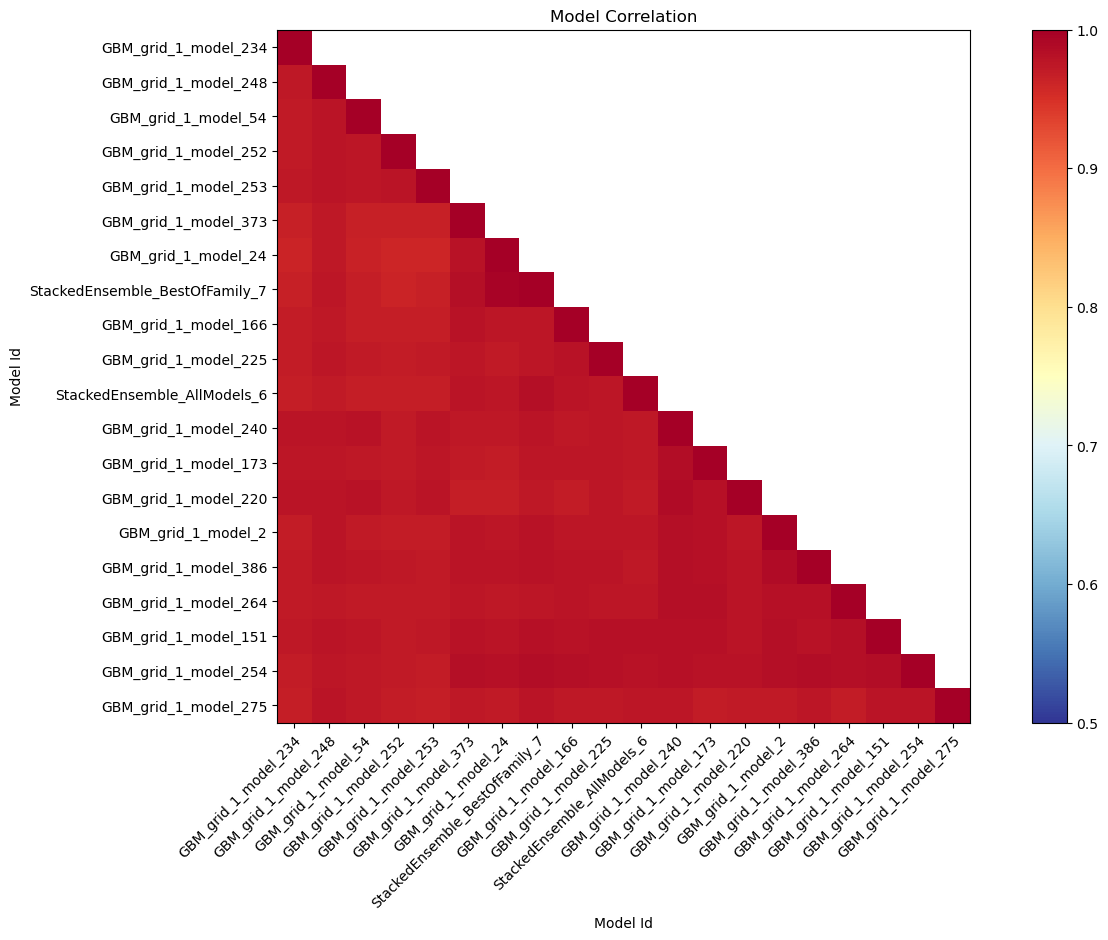

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

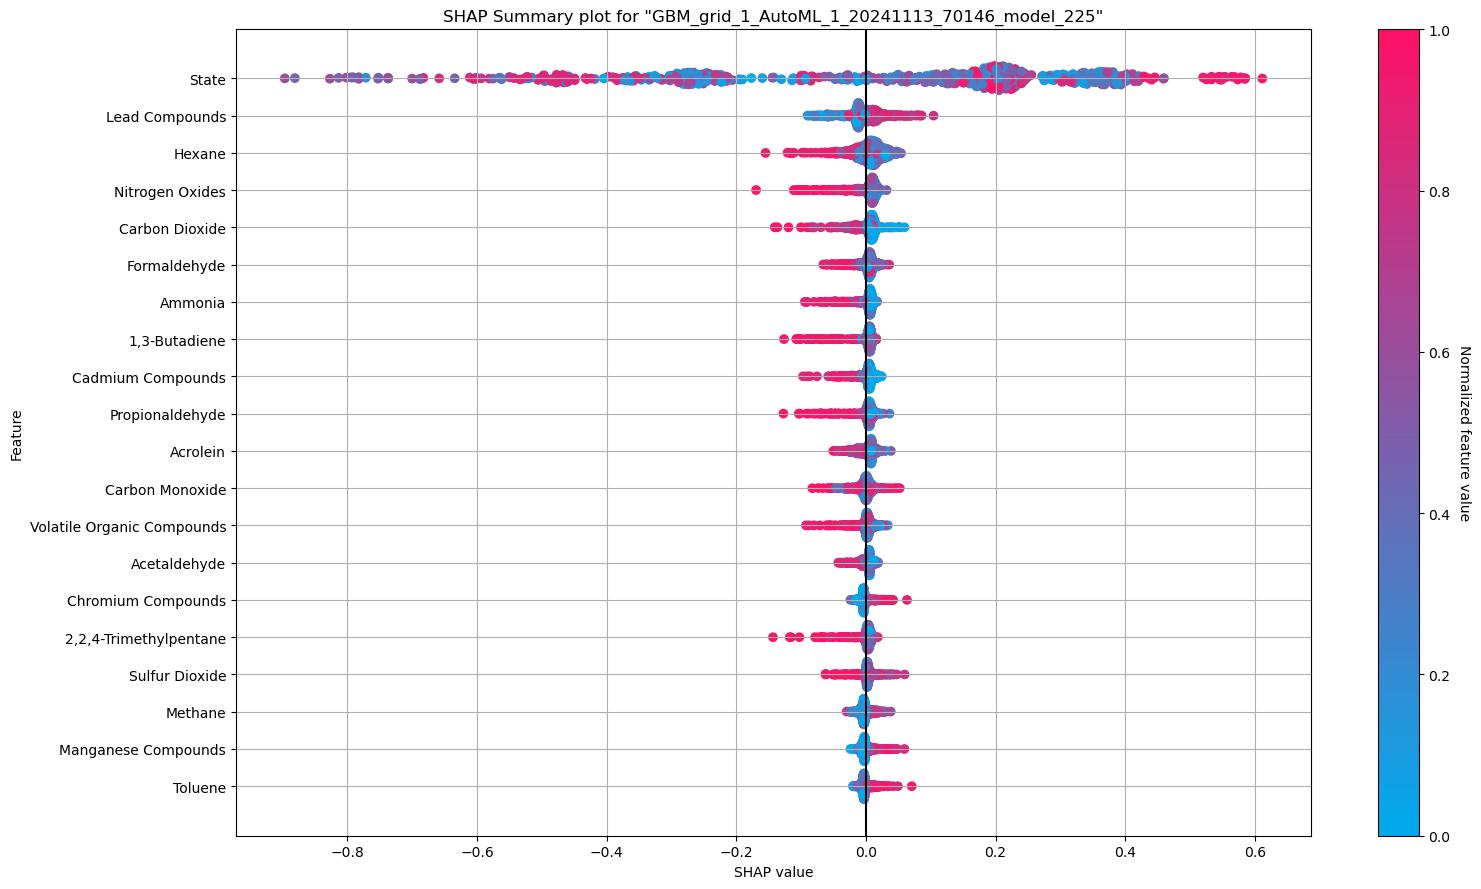

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

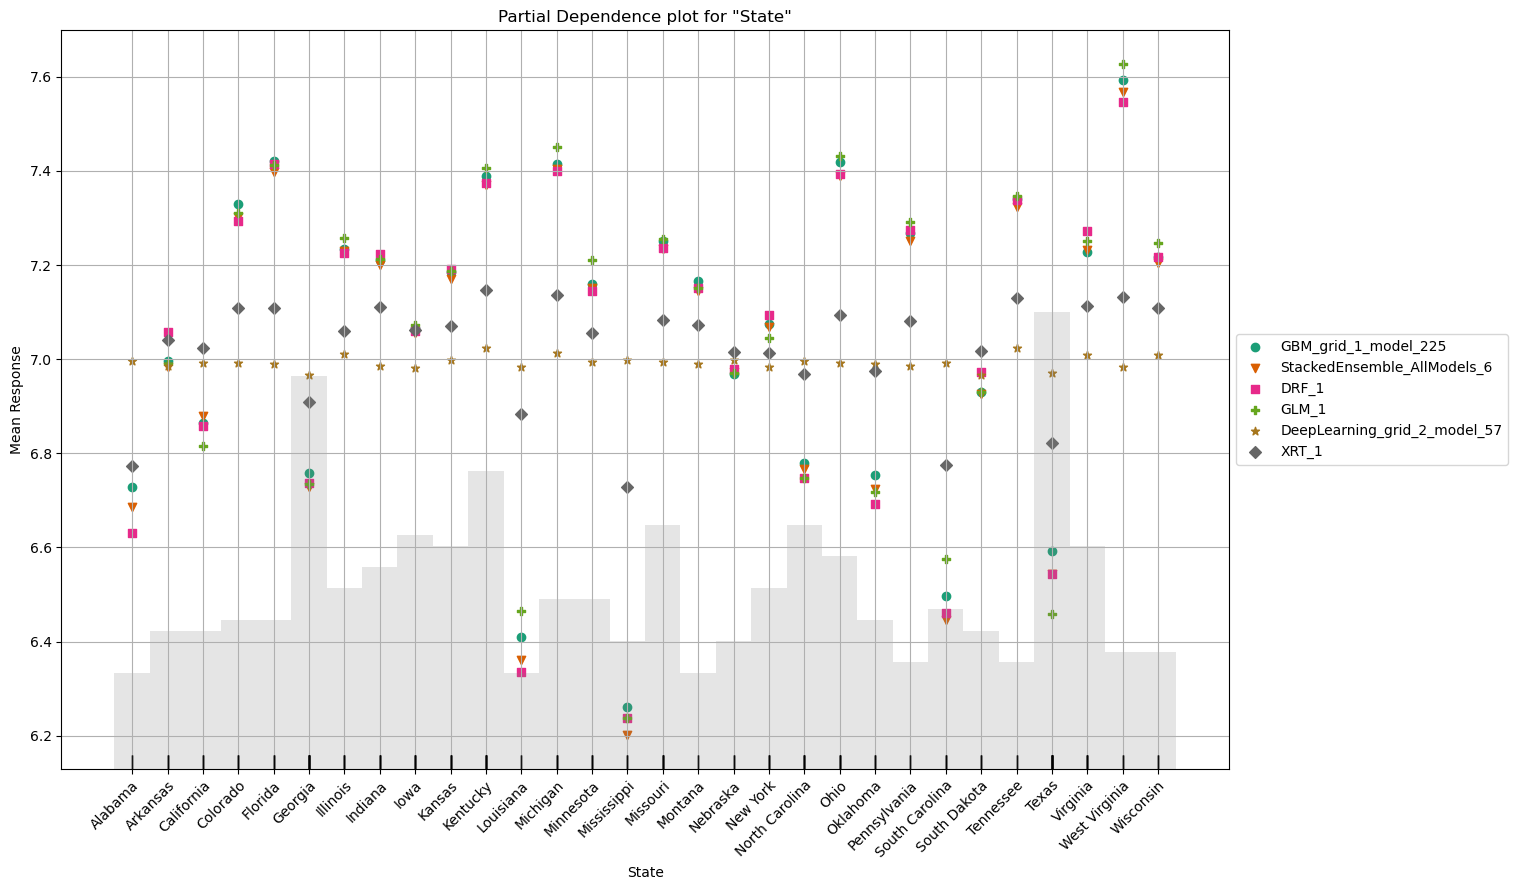

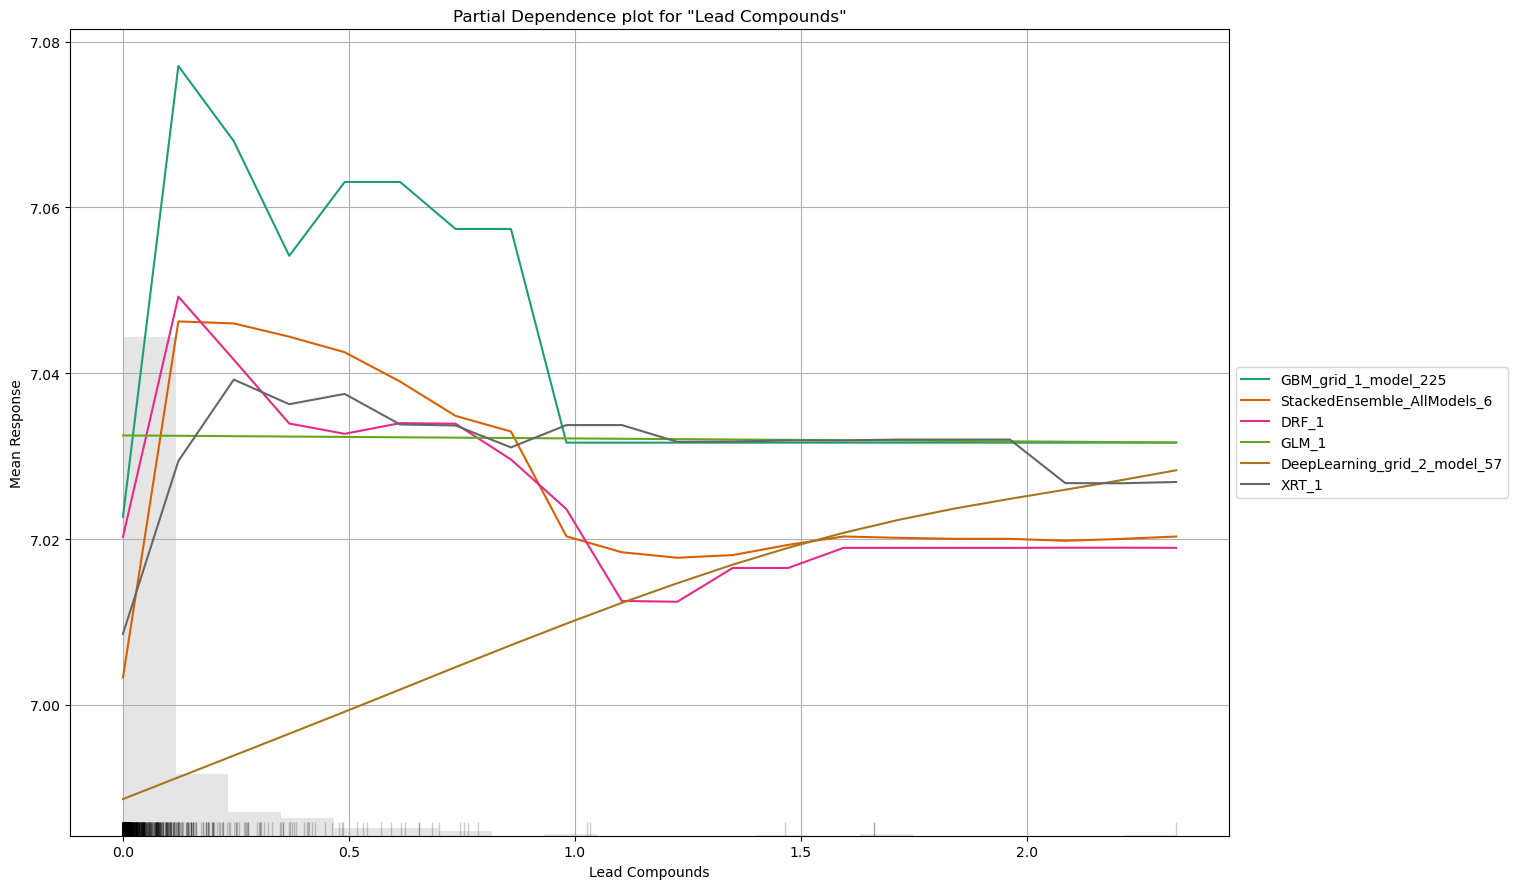

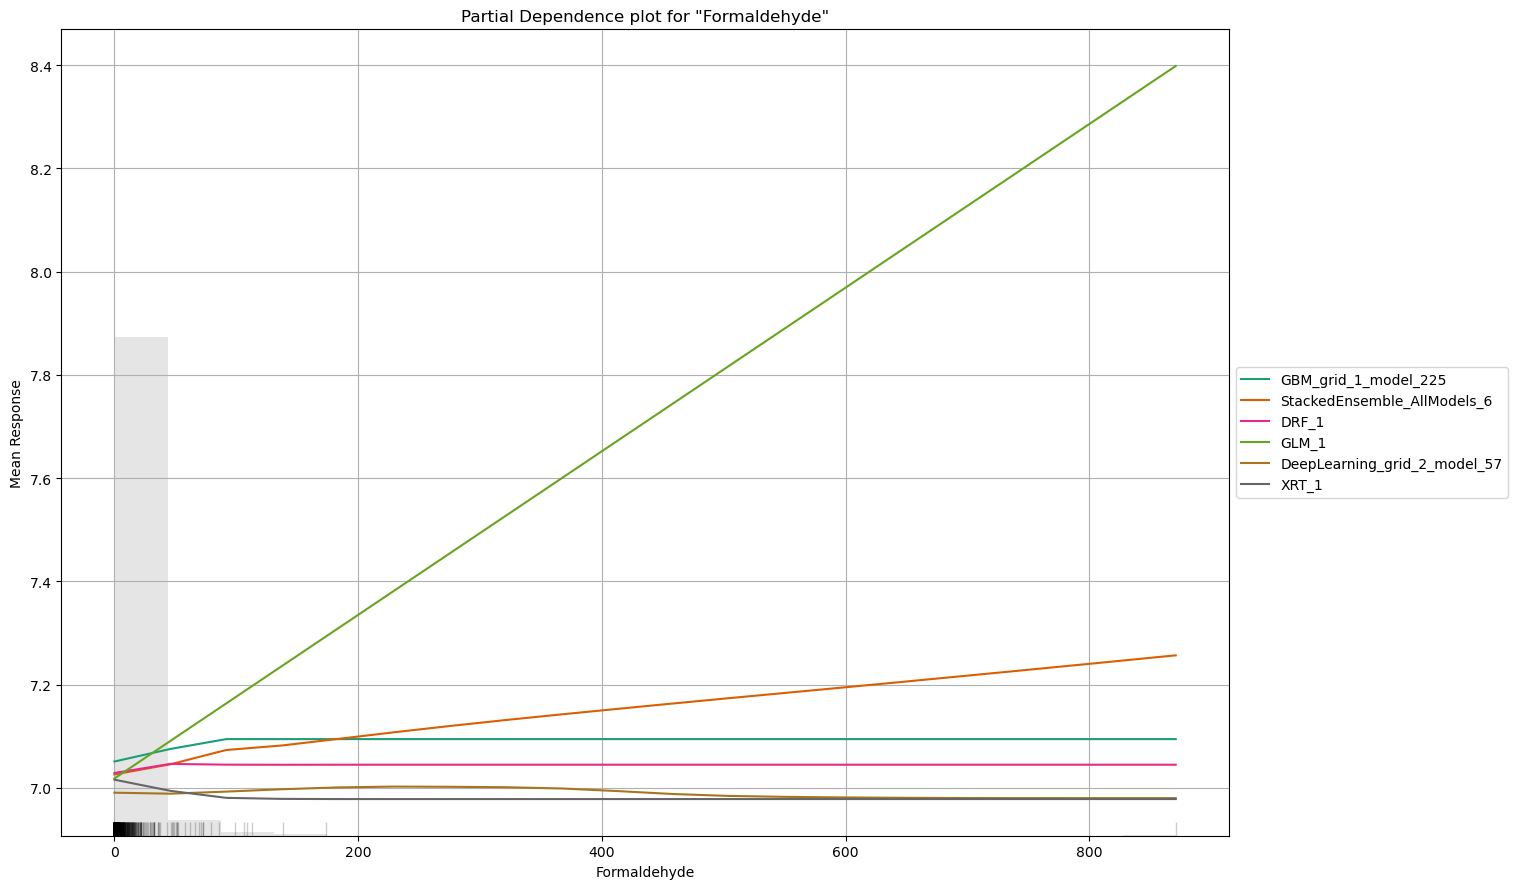

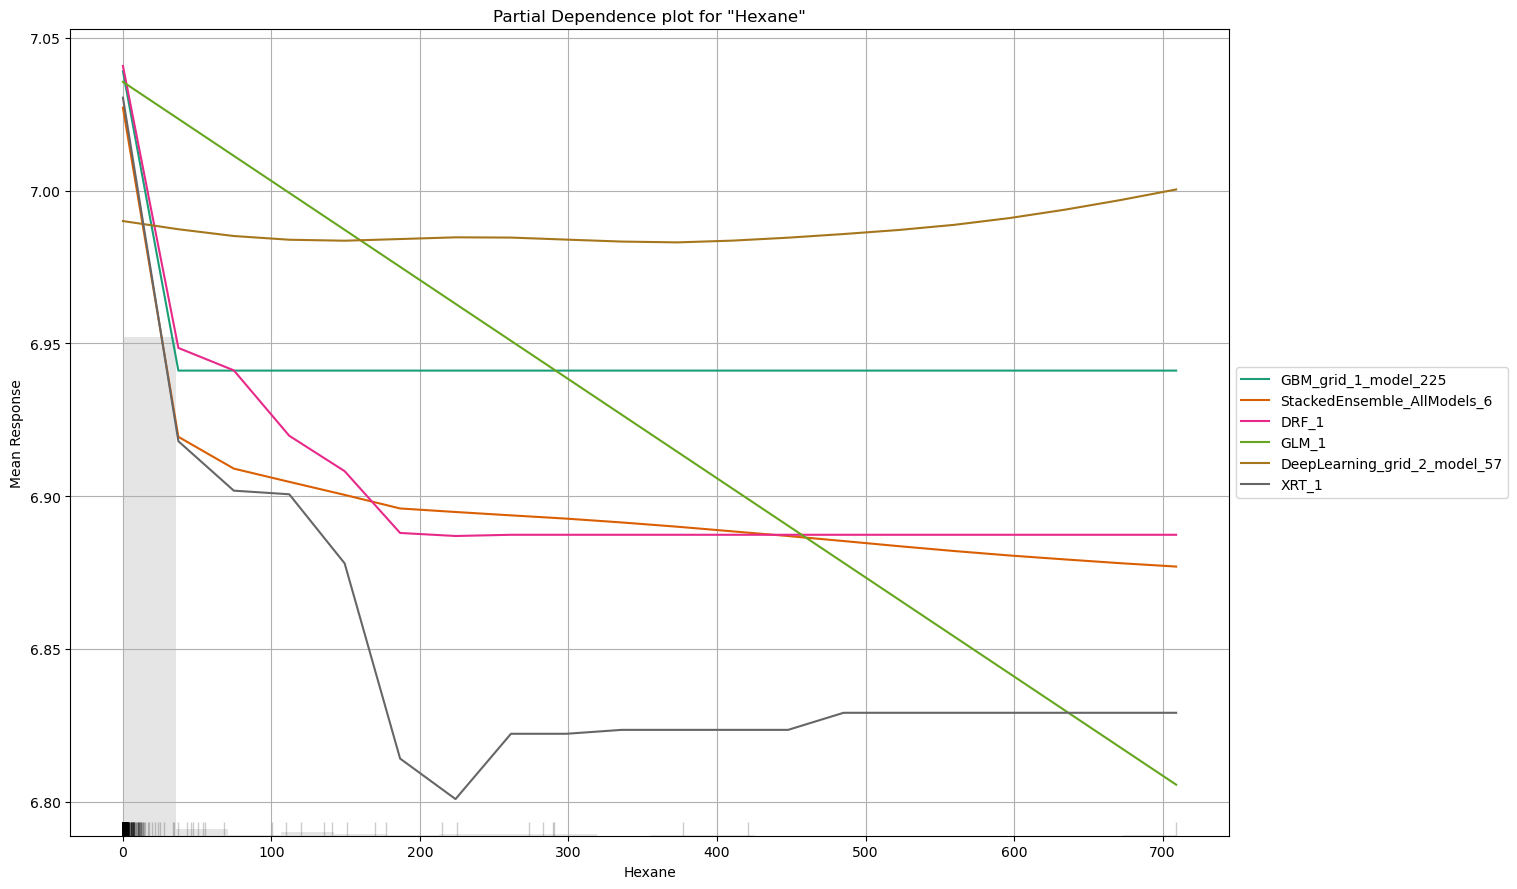

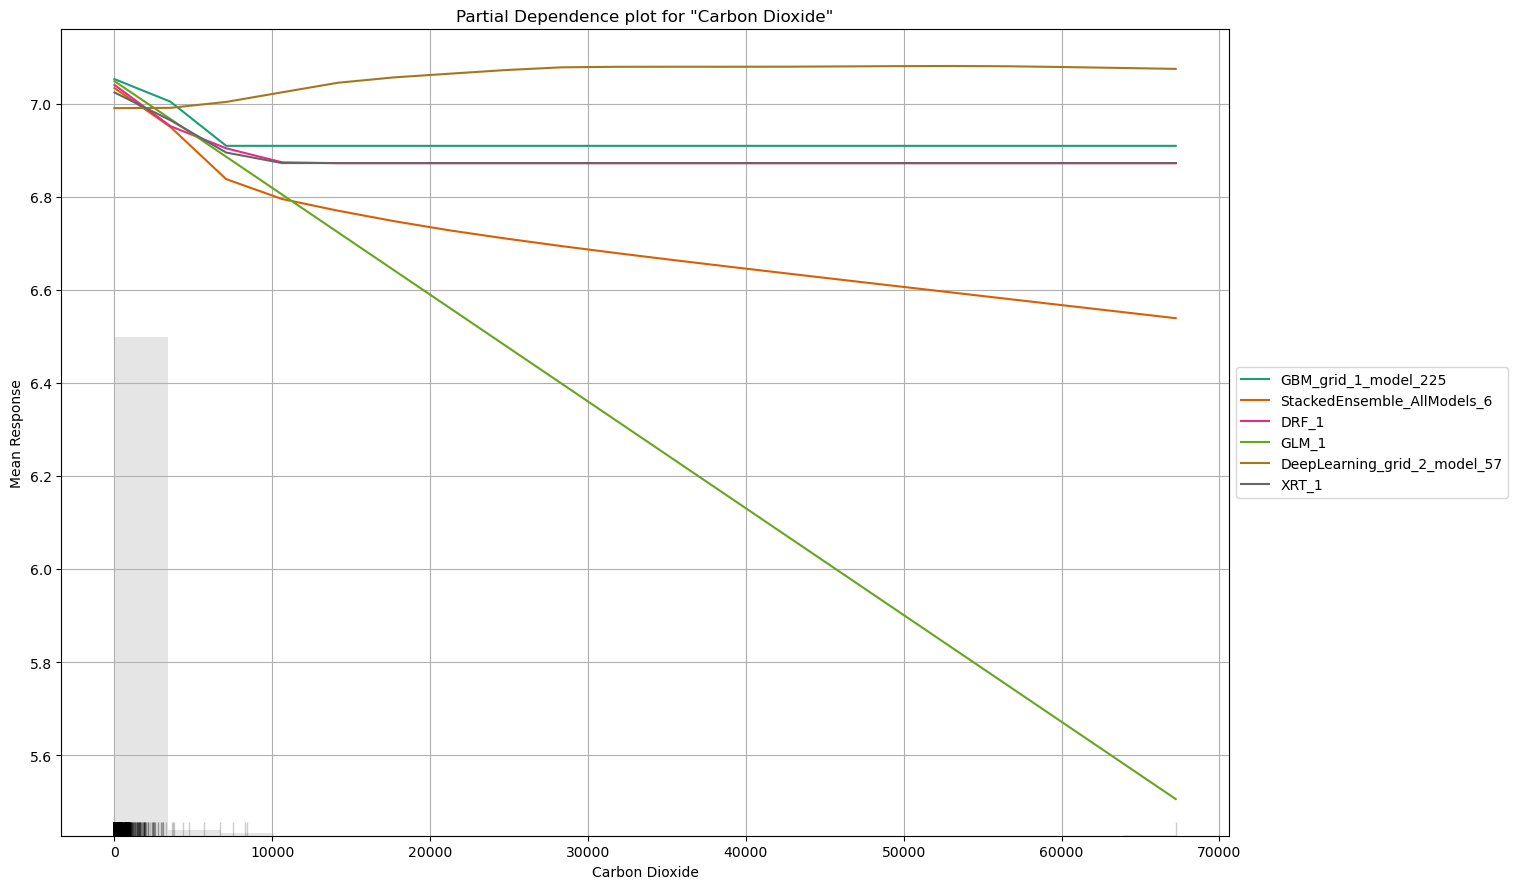

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

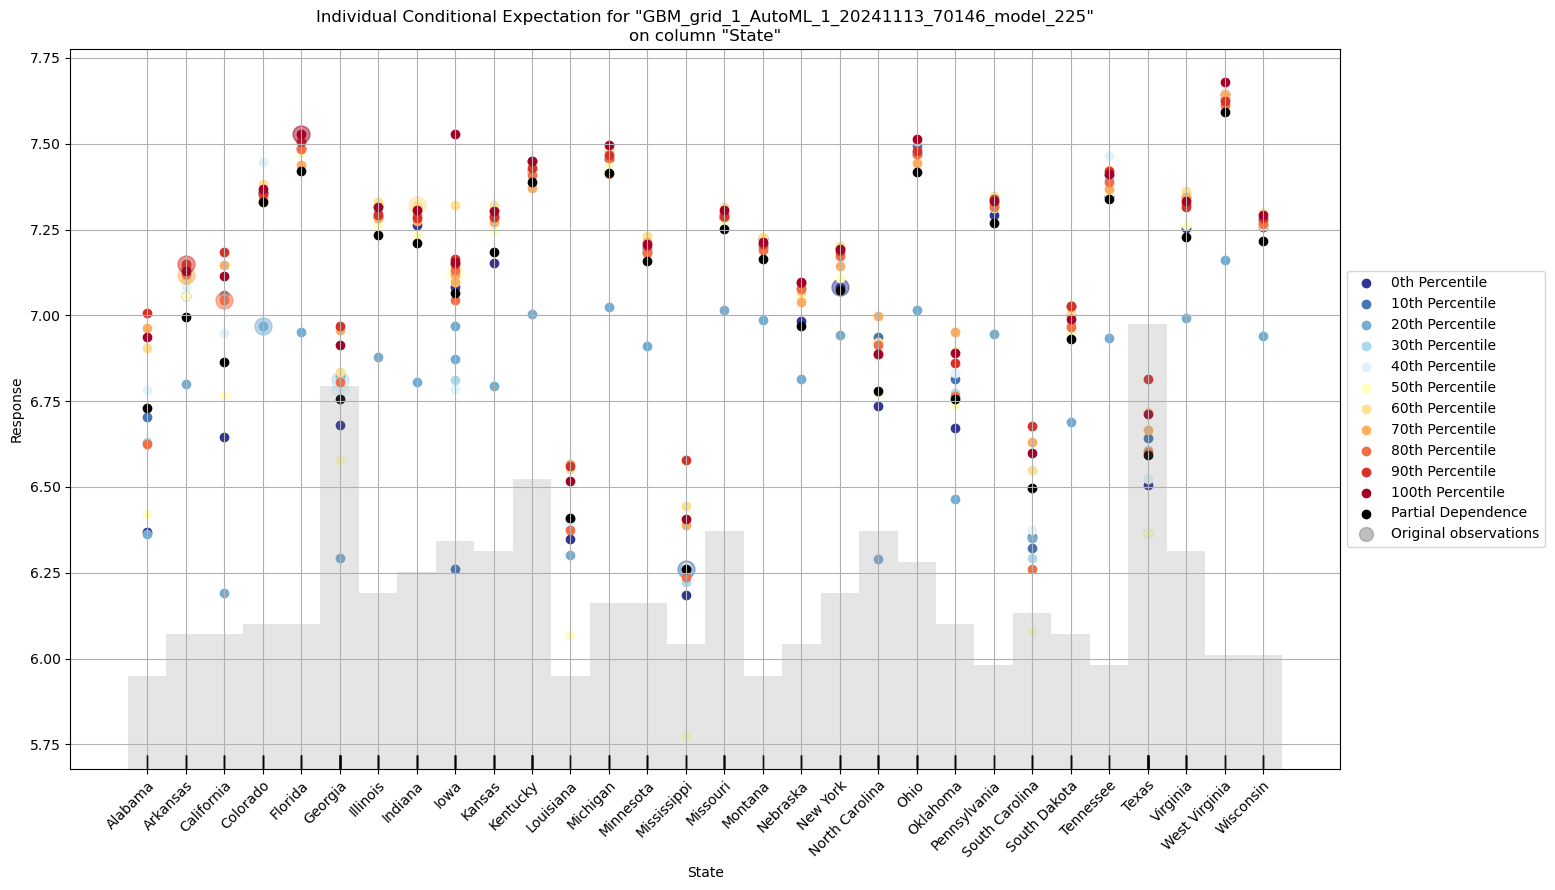

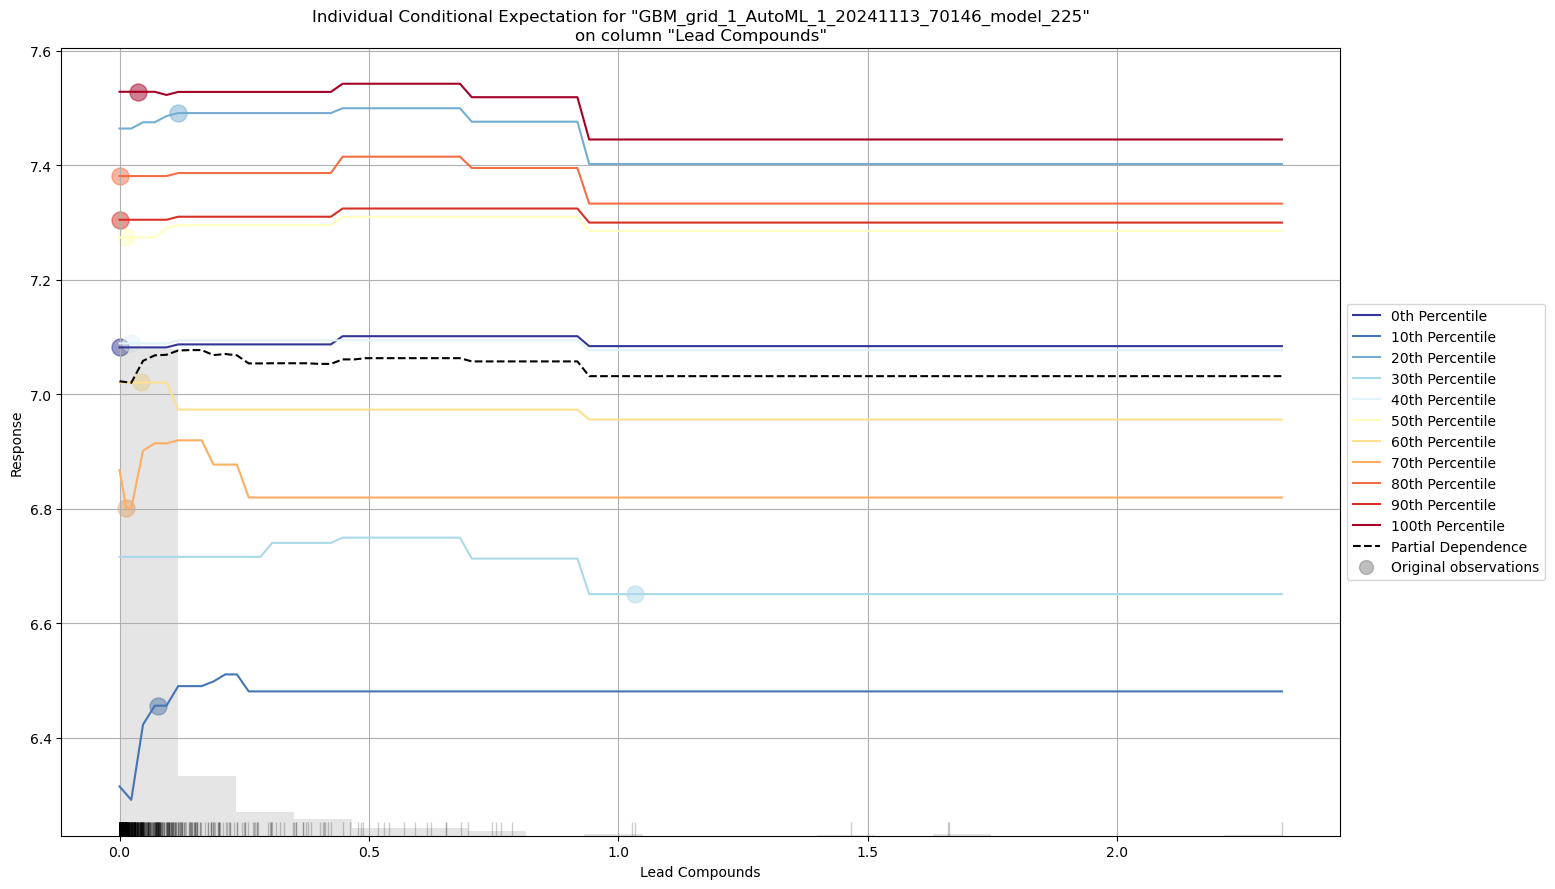

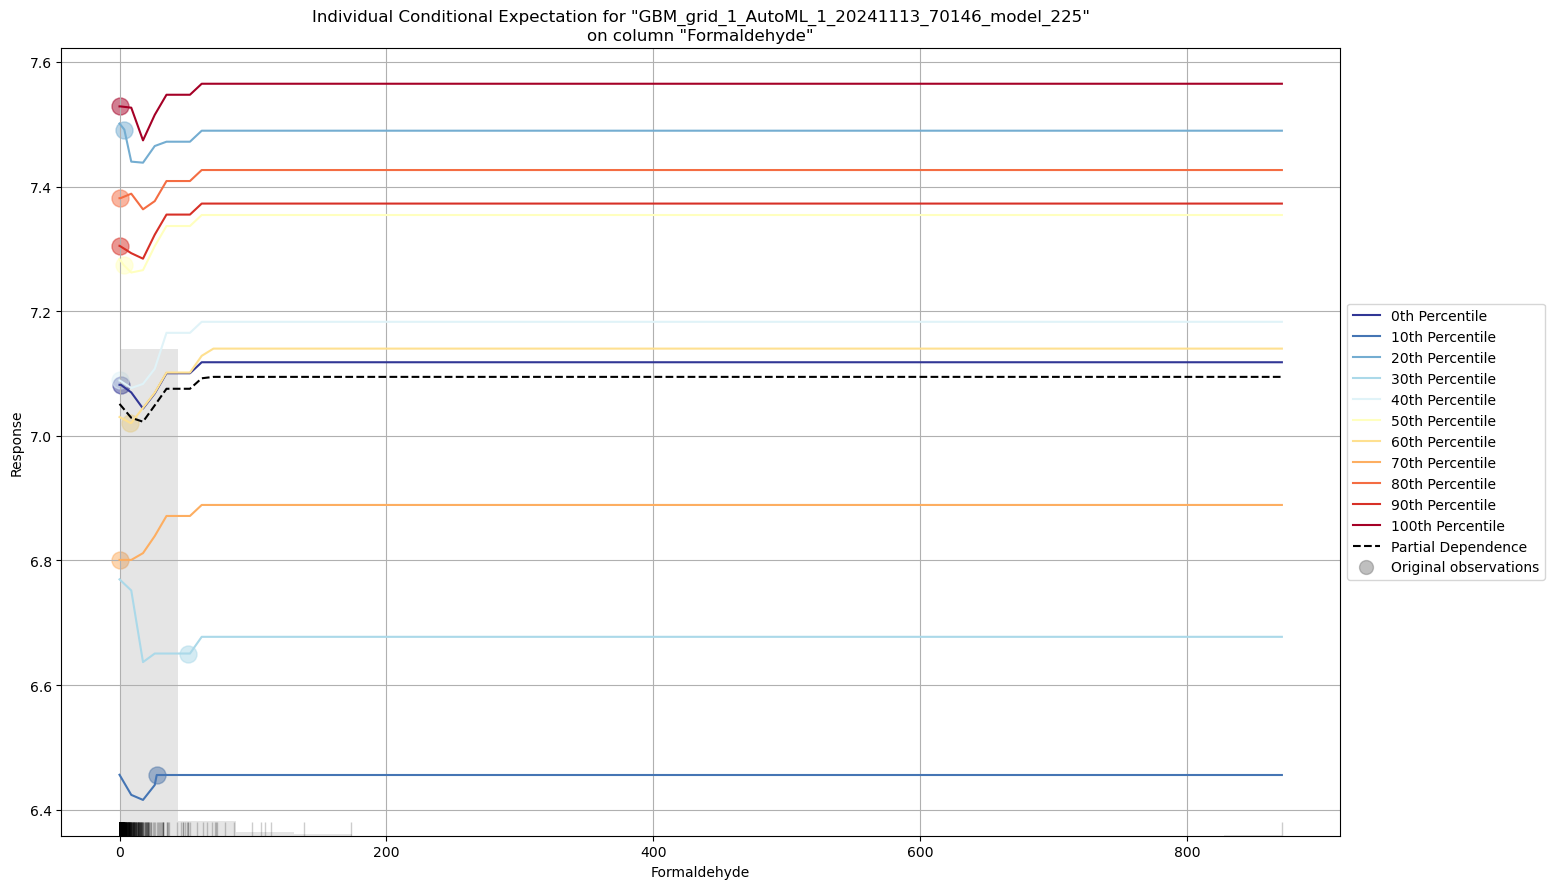

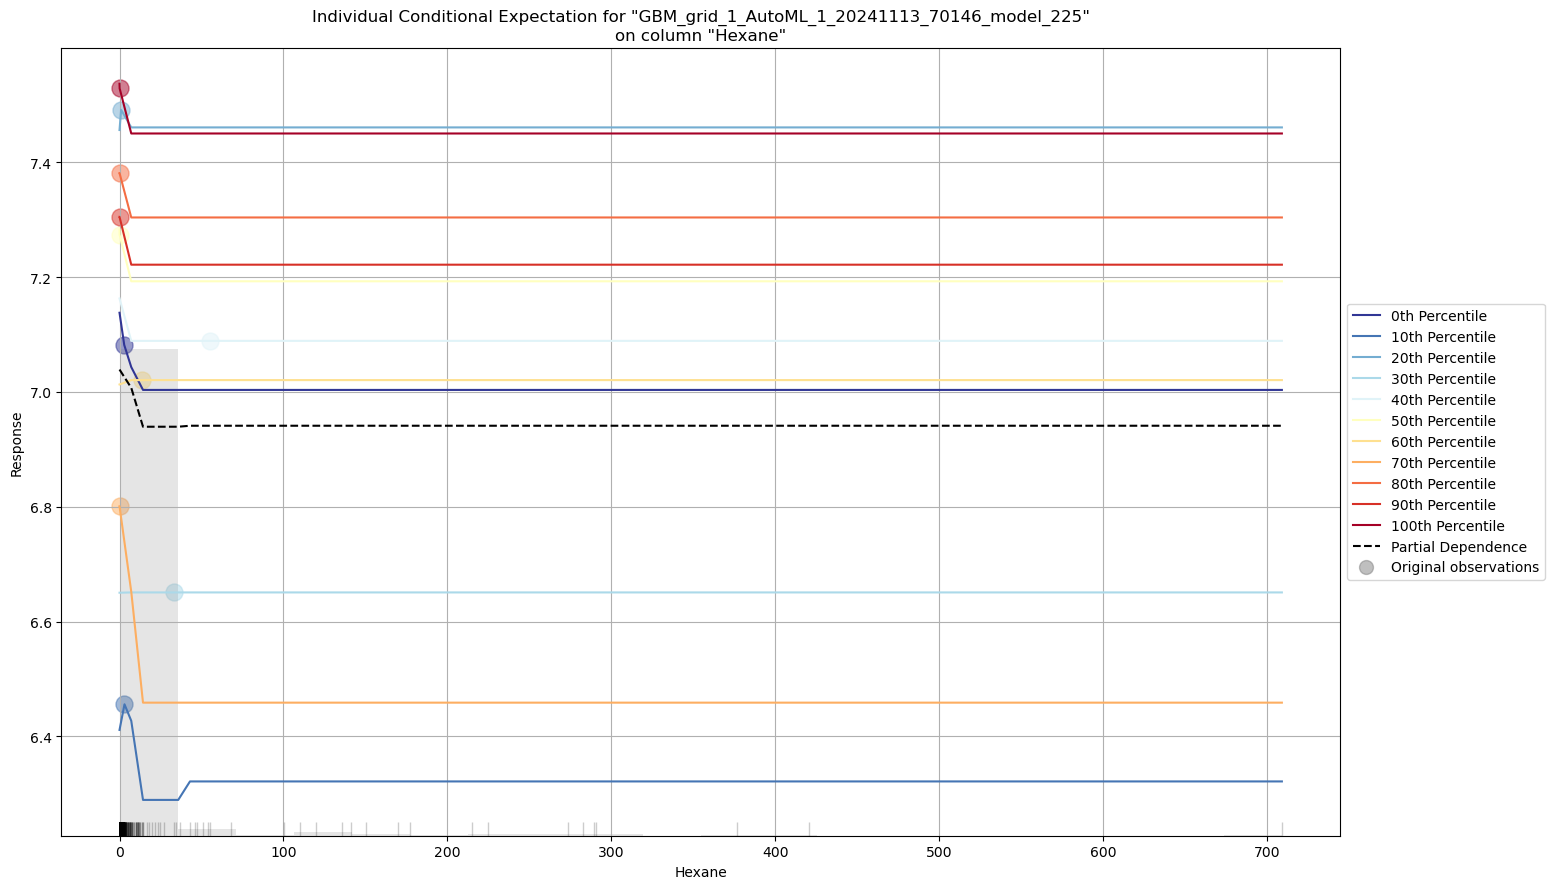

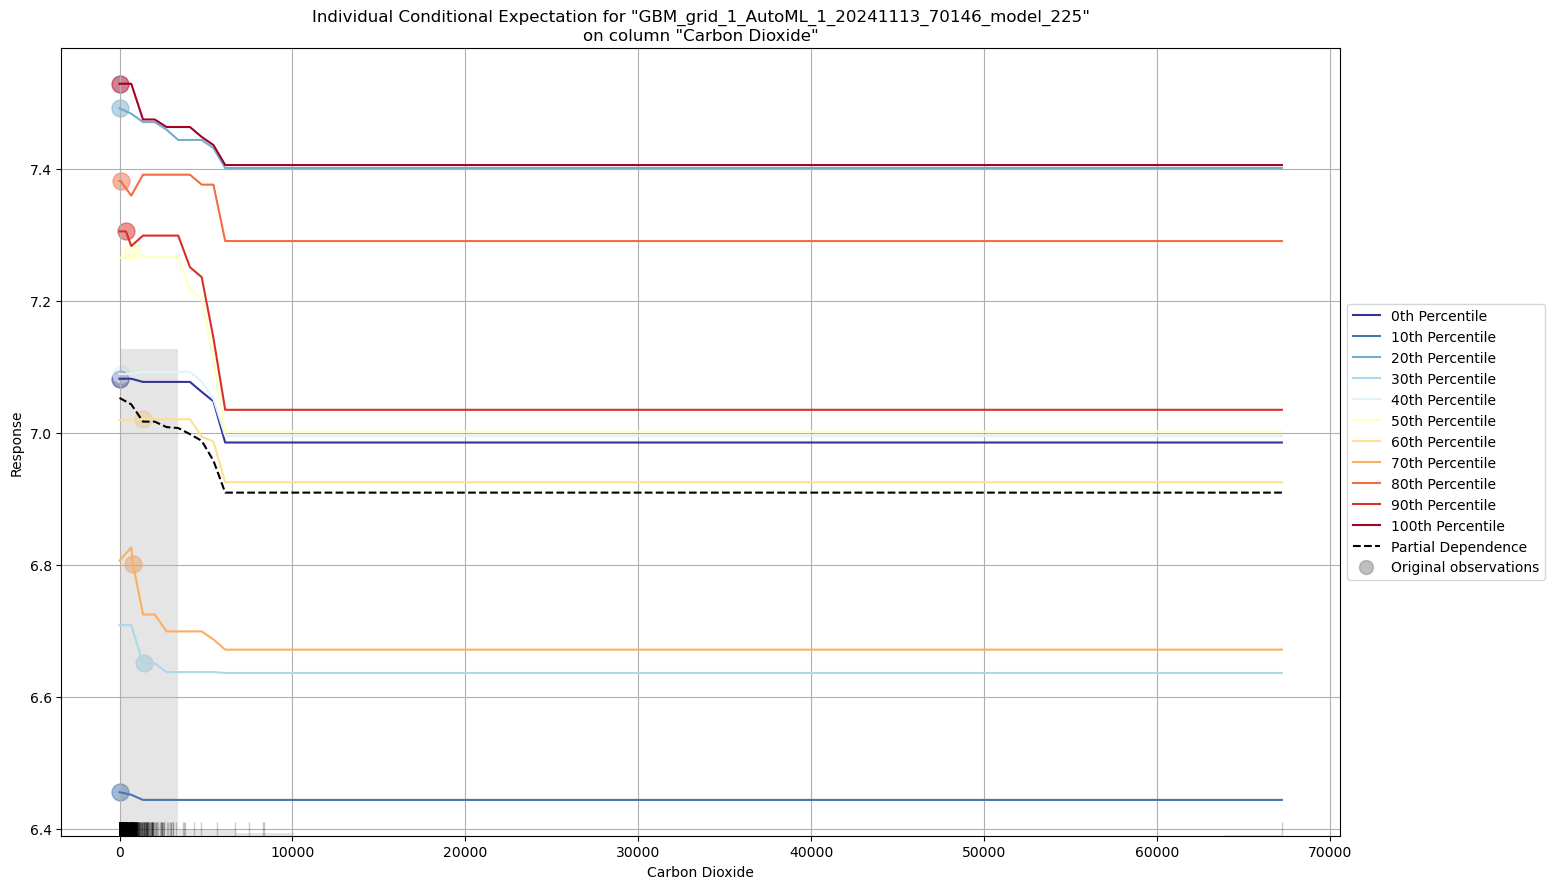

In [9]:
exa = aml.explain(test)